In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.patches as mpatches

## SPD - slack parameter study - 80 Nodes

In [224]:
df = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\data_5\\data_dd_n_60_p_0_pdf.csv')

In [225]:
df.head()

,run,PauseTime,repetition,Module,echoedPk:count,echoedPk:sum(packetBytes),packetReceived:count,packetReceived:sum(packetBytes),packets received,packets sent,packetSent:count,packetSent:sum(packetBytes)
0,RandomWaypointMobility-SPD-B-87-20211204-16:18...,900,27,TARPNetwork.node[22].app[0],899.0,899000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,RandomWaypointMobility-SPD-B-87-20211204-16:18...,900,27,TARPNetwork.node[17].app[0],NaN,NaN,859.0,859000.0,859.0,900.0,900.0,900000.0
2,RandomWaypointMobility-SPD-B-79-20211204-16:07...,900,19,TARPNetwork.node[17].app[0],NaN,NaN,106.0,106000.0,106.0,900.0,900.0,900000.0
3,RandomWaypointMobility-SPD-B-64-20211204-16:06...,900,4,TARPNetwork.node[17].app[0],NaN,NaN,874.0,874000.0,874.0,900.0,900.0,900000.0
4,RandomWaypointMobility-SPD-B-63-20211204-16:04...,900,3,TARPNetwork.node[17].app[0],NaN,NaN,811.0,811000.0,811.0,900.0,900.0,900000.0


In [226]:
df.Module = df.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [227]:
df = df.sort_values(by=['repetition'])

In [228]:
df_17 = df.loc[df['Module'] == '17']
df_22 = df.loc[df['Module'] == '22']

In [229]:
results = []
results_x = []
count = 0

for index, row in df_17.iterrows():
        x = df_22.iloc[count]["echoedPk:count"]
        res = round((row['packetReceived:count'] + x)/(x + row['packetSent:count']), 4) 
        results.append(res)
        res_x = round((x)/(row['packetSent:count']), 4) 
        results_x.append(res_x)
        count+=1


In [230]:
print (results)   

[0.9867, 0.5681, 0.5542, 0.9505, 0.9855, 0.8983, 0.9711, 0.5842, 0.1782, 0.5548, 0.9855, 0.9533, 0.9531, 0.9889, 0.982, 0.9455, 0.9444, 0.9828, 0.5798, 0.2709, 0.5887, 0.587, 0.9744, 0.9703, 0.9644, 0.2453, 0.9733, 0.9772, 0.5603, 0.9461]


In [231]:
print (results_x) 

[0.9989, 0.9989, 0.9989, 0.9967, 0.9989, 0.8789, 0.9989, 0.9989, 0.1222, 0.9989, 0.9989, 0.9989, 0.99, 0.9989, 0.97, 0.9989, 0.9989, 0.9989, 0.9989, 0.21, 0.9989, 0.9989, 0.9989, 0.9811, 0.9989, 0.1867, 0.9989, 0.9989, 0.9989, 0.9978]


In [232]:
print("Mean:", round(sum(results) / len(results)*100,2))

Mean: 78.68


In [233]:
print("Mean:", round(sum(results_x) / len(results_x)*100,2))

Mean: 91.03


In [235]:
df_dd_x = pd.DataFrame({'PauseTime':[0, 50, 100, 300, 600, 900],
                       'PDF':[98.9, 97.84, 98.85, 99.13, 95.45, 96.84]})

dd_x_errors = [0.489, 1.12, 0.662, 0.654, 0.535 , 4.95]


df_spd_1_x = pd.DataFrame({'PauseTime':[0, 50, 100, 300, 600, 900],
                       'PDF':[88.47, 88.18, 87.13, 88.47, 88.18, 87.13]})

spd_1_x_errors = [2.36, 2.57, 3.14, 2.36, 2.57, 3.14]


df_spd_2_x = pd.DataFrame({'PauseTime':[0, 50, 100, 300, 600, 900],
                       'PDF':[96.51, 95.2, 97.58, 97.36, 94.82, 91.03]})

spd_2_x_errors = [1.15, 1.41 , 0.871, 1.14, 0.557, 8.84]

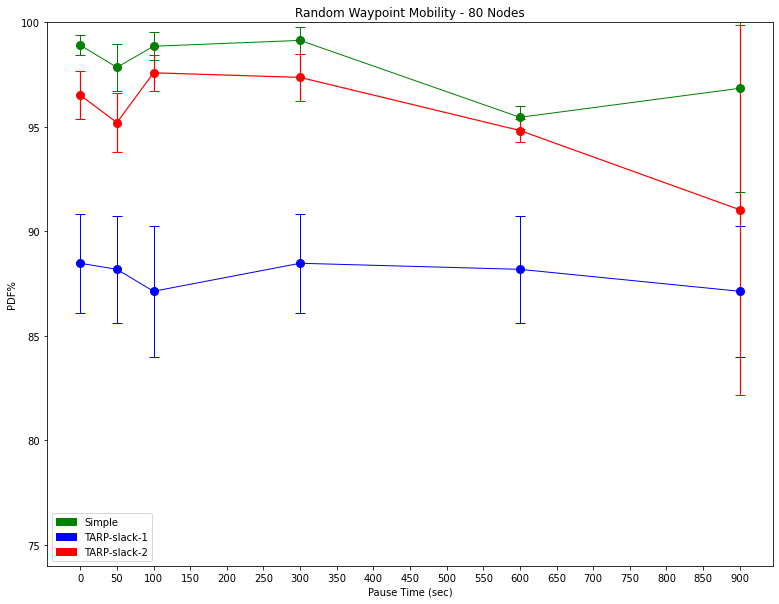

In [237]:
plt.xlabel("Pause Time (sec)")
plt.ylabel("PDF%")
plt.title("Random Waypoint Mobility - 80 Nodes")

plt.xticks(np.arange(0,901, 50))
plt.yticks(np.arange(70,101, 5))
# plt.grid()

# plt.plot(df_dd_x.PauseTime, df_dd_x.PDF,  'g-x') 

# plt.plot(df_spd_1_x.PauseTime, df_spd_1_x.PDF,  'b-x') 

# plt.plot(df_spd_2_x.PauseTime, df_spd_2_x.PDF,  'r-x') 

plt.ylim([74, 100])

plt.errorbar(
  x=df_dd_x.PauseTime, 
  y=df_dd_x.PDF, 
  yerr=dd_x_errors, 
  capsize=5,
  marker='o', 
  color='green', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_1_x.PauseTime, 
  y=df_spd_1_x.PDF, 
  yerr=spd_1_x_errors, 
  capsize=5,
  marker='o', 
  color='blue', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_2_x.PauseTime, 
  y=df_spd_2_x.PDF, 
  yerr=spd_2_x_errors, 
  capsize=5,
  marker='o', 
  color='red', 
  markersize=8, 
  linewidth=1.2, 
  linestyle='-')

red_patch = mpatches.Patch(color='red', label='TARP-slack-2')
green_patch = mpatches.Patch(color='green', label='Simple')
blue_patch = mpatches.Patch(color='blue', label='TARP-slack-1')

plt.legend(handles=[ green_patch, blue_patch, red_patch])

fig = plt.gcf()
fig.set_size_inches(13, 10)
plt.savefig('simulation-pdf-80-new.png', dpi=300)